## 🛠️ Setting Up Our Toolkit: Installing Libraries 🚀

In [ ]:
!pip install -q byaldi
!sudo apt-get install -y poppler-utils
!pip install -q git+https://github.com/huggingface/transformers.git qwen-vl-utils flash-attn optimum auto-gptq bitsandbytes
!pip install -q ollama
!pip install -q colab-xterm
!pip install -q triton
!sudo apt-get update
!sudo apt-get install poppler-utils

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.9/517.9 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 95.9 MB/s eta 0:00:00
  

## 🧠 Loading the ColPali RAG Model 🚀

In [ ]:
import os
import base64
from byaldi import RAGMultiModalModel

RAG = RAGMultiModalModel.from_pretrained("vidore/colpali-v1.2", verbose=1)

Verbosity is set to 1 (active). Pass verbose=0 to make quieter.


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


adapter_config.json:   0%|          | 0.00/750 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/66.3k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/862M [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

adapter_model.safetensors:   0%|          | 0.00/78.6M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/700 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/243k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.8M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/733 [00:00<?, ?B/s]

## 📄 Get Your Document!

In [ ]:
!wget https://arxiv.org/pdf/1706.03762 # You can download any documents on the internet (the code will download the Attention is all you need paper .pdf file)
!mkdir docs
!mv 1706.03762 docs/attention.pdf

--2025-04-11 05:44:34--  https://arxiv.org/pdf/1706.03762
Resolving arxiv.org (arxiv.org)... 151.101.67.42, 151.101.3.42, 151.101.195.42, ...
Connecting to arxiv.org (arxiv.org)|151.101.67.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2215244 (2.1M) [application/pdf]
Saving to: ‘1706.03762’

1706.03762          100%[===================>]   2.11M  --.-KB/s    in 0.02s   

2025-04-11 05:44:35 (84.9 MB/s) - ‘1706.03762’ saved [2215244/2215244]



## 📚 Indexing Our Sample PDF

In [ ]:
RAG.index(
    input_path="./docs/attention.pdf",
    index_name="attention",
    store_collection_with_index=True,  # Store base64 representation of images
    overwrite=True
)

Added page 1 of document 0 to index.
Added page 2 of document 0 to index.
Added page 3 of document 0 to index.
Added page 4 of document 0 to index.
Added page 5 of document 0 to index.
Added page 6 of document 0 to index.
Added page 7 of document 0 to index.
Added page 8 of document 0 to index.
Added page 9 of document 0 to index.
Added page 10 of document 0 to index.
Added page 11 of document 0 to index.
Added page 12 of document 0 to index.
Added page 13 of document 0 to index.
Added page 14 of document 0 to index.
Added page 15 of document 0 to index.
Index exported to .byaldi/attention
Index exported to .byaldi/attention


{0: 'docs/attention.pdf'}

##⚙️👀 Setting Up Gemma3 Vision for Reasoning (>= 4B Required!)
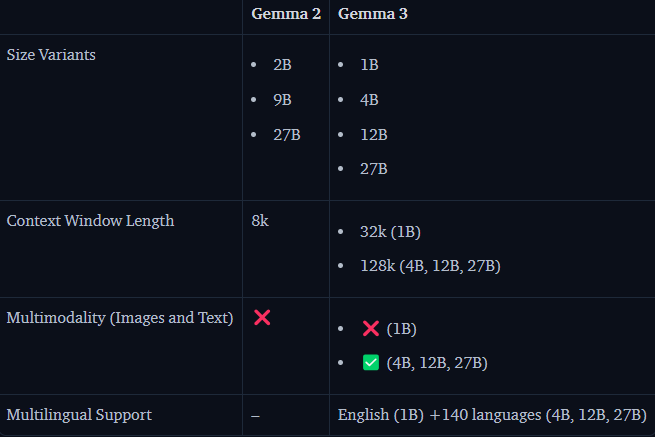

In [ ]:
!sudo apt update
!sudo apt install -y pciutils
!curl -fsSL https://ollama.com/install.sh | sh

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
32 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InR

In [ ]:
import threading
import subprocess
import time

def run_ollama_serve():
  subprocess.Popen(["ollama", "serve"])

thread = threading.Thread(target=run_ollama_serve)
thread.start()
time.sleep(5)

In [ ]:
!ollama pull gemma3:4b

pulling manifest ⠙ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠼ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠇ pulling manifest ⠏ pulling manifest ⠋ pulling manifest ⠙ pulling manifest 
pulling aeda25e63ebd...   0% ▕▏    0 B/3.3 GB                  pulling manifest 
pulling aeda25e63ebd...   0% ▕▏    0 B/3.3 GB                  pulling manifest 
pulling aeda25e63ebd...   0% ▕▏    0 B/3.3 GB                  pulling manifest 
pulling aeda25e63ebd...   0% ▕▏    0 B/3.3 GB                  pulling manifest 
pulling aeda25e63ebd...   0% ▕▏    0 B/3.3 GB                  pulling manifest 
pulling aeda25e63ebd...   1% ▕▏  35 MB/3.3 GB                  pulling manifest 
pulling aeda25e63ebd...   4% ▕▏ 142 MB/3.3 GB                  pulling manifest 
pulling aeda25e63ebd...   6% ▕▏ 200 MB/3.3 GB                  pulling manifest 
pulling aeda25e63ebd...   9% ▕▏ 312 MB/3.3 GB                  pulling manifest 
pulling aeda25e63ebd...  

## 🚀 Time to Infer! Let's Get Some Results!

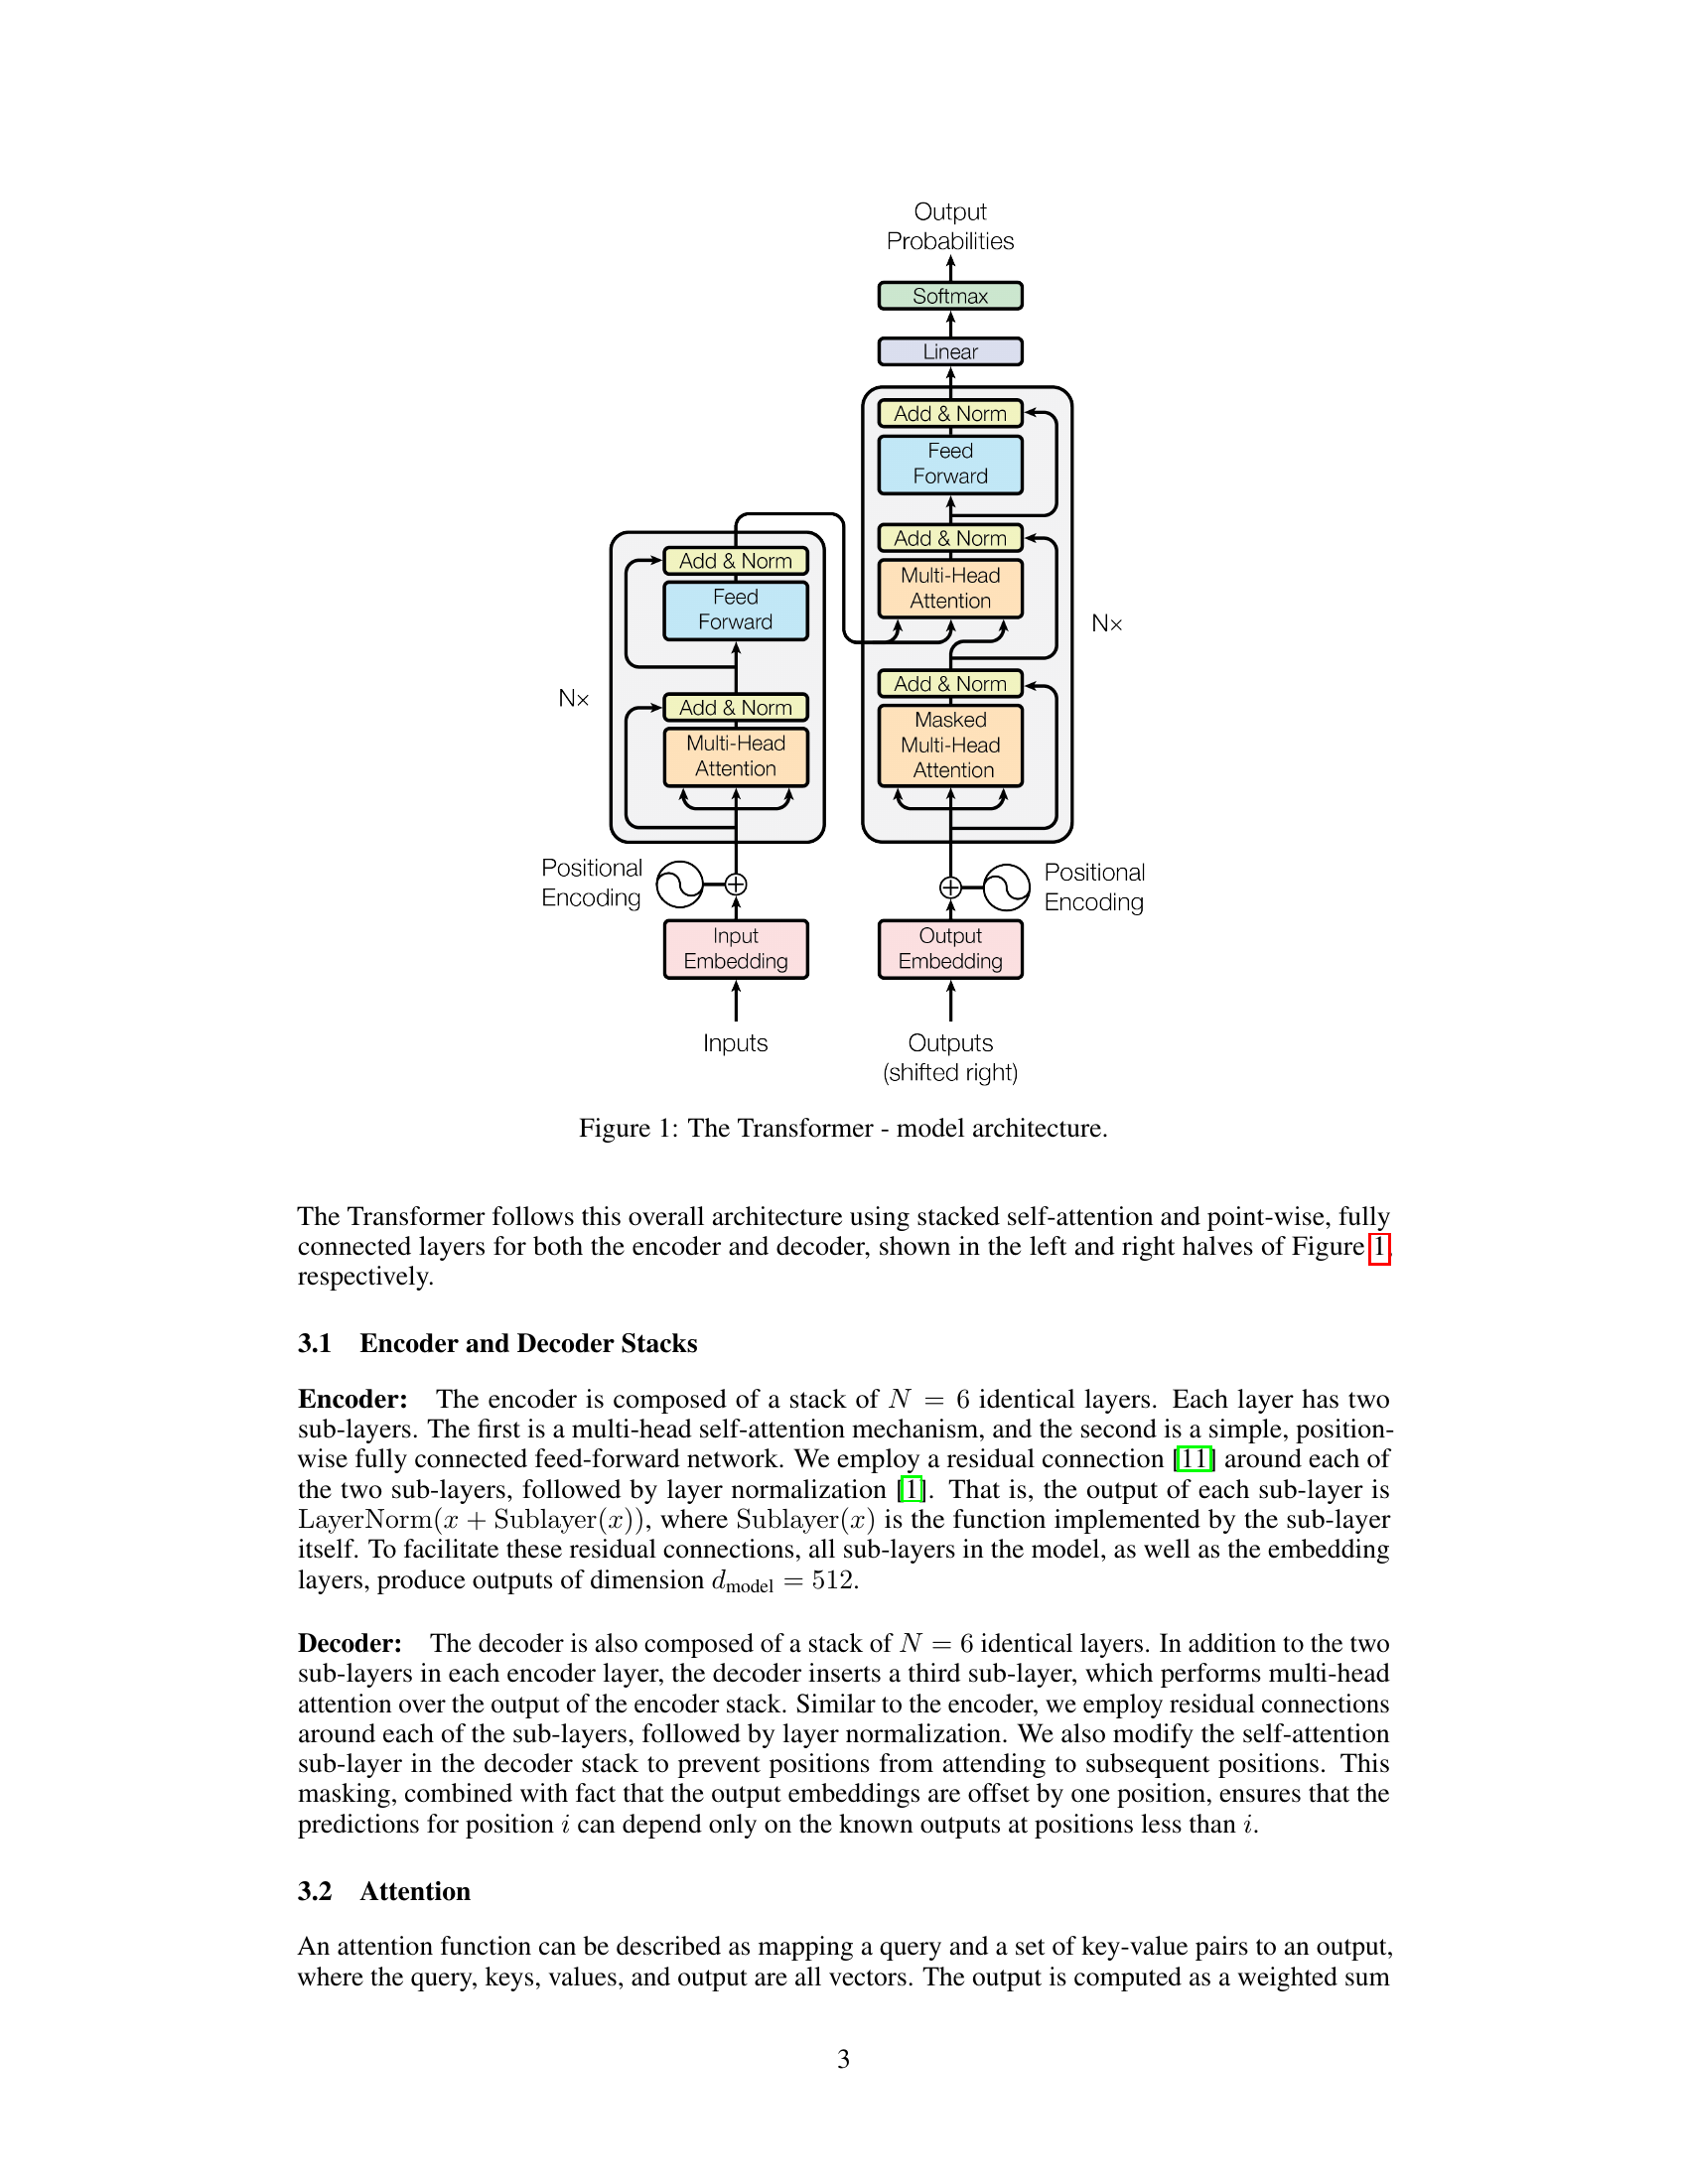

Hình 1 mô tả kiến trúc của mô hình Transformer, được xây dựng bằng cách xếp chồng các lớp (stacked layers) cho cả mã hóa (encoder) và giải mã (decoder), như hình minh họa bên trái và bên phải. Dưới đây là giải thích chi tiết từng thành phần:

**1. Encoder (Mã hóa):**

*   **Stacked Layers (Lớp xếp chồng):**  Mã hóa được cấu thành từ N lớp xếp chồng, trong đó N là số lượng lớp.
*   **Multi-Head Self-Attention (Tự chú ý đa đầu):** Mỗi lớp bao gồm hai sub-layer:
    *   **Sub-layer 1:**  Sử dụng cơ chế tự chú ý đa đầu (multi-head self-attention). Cơ chế này cho phép mô hình xác định mối quan hệ giữa các từ trong câu đầu vào, giúp nó hiểu ngữ cảnh tốt hơn.
    *   **Sub-layer 2:**  Sử dụng feed-forward network (mạng nơ-ron truyền thẳng) kết nối với từng vị trí.
*   **Layer Normalization (Chuẩn hóa lớp):** Sau mỗi sub-layer, mô hình sử dụng LayerNorm để ổn định quá trình huấn luyện.
*   **Residual Connection (Kết nối dư thừa):** Kết nối dư thừa được sử dụng để giúp truyền tín hiệu từ sub-la

In [ ]:
from IPython.display import Image
import ollama
import base64 # Import the base64 library

def see_image(image_base64):
    """
    Decodes a base64 encoded image and displays it in the Colab notebook.

    Args:
        image_base64: A string containing the base64 encoded image data.
    """
    image_bytes = base64.b64decode(image_base64)
    filename = 'image.jpg'
    with open(filename, 'wb') as f:
        f.write(image_bytes)
    display(Image(filename))

def inference(question: str):
    """
    Performs inference using the Gemma3 vision model.

    It retrieves relevant data based on the question (assumes a 'RAG' object exists),
    displays an image from the retrieved data, and then sends the question along with
    the local image to the Gemma3 model for a response.

    Args:
        question: The user's question as a string.

    Returns:
        str: The text content of the Gemma3 model's response.
    """
    results = RAG.search(question, k=1)  # Retrieve relevant data
    see_image(results[0]['base64'])  # Save and display image

    response = ollama.chat(
        model='gemma3:4b',
        messages=[{
            'role': 'user',
            'content': question,
            'images': ['image.jpg']
        }]
    )

    return response['message']['content']

# Example queries
inference_result = inference("Hãy giải thích bằng tiếng Việt figure 1.")
print(inference_result)